In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from Utilities.get_image_data import load_data
from Utilities.form_train_val_test_batches import form_train_val_test_batches
from Utilities.NN_FC_layerwise import FCLayerwise
from Utilities.NN_FC_layerwise_new import FCLayerwise_new
from Utilities.Net import Final_Network
from Utilities.Net_new import Final_Network_ALGO_II
from Utilities.create_data import create_new
from Utilities.loss_and_accuracies import data_loss_classification, accuracy_classification
from Utilities.manifold_regularization import manifold_classification
from Utilities.manifold_regularization_new import manifold_classification_new
from Utilities.optimize_layerwise import optimize
from Utilities.additive_output import net_output 
from Utilities.plot_and_save_figures_layerwise import plot_fig
from joblib import Parallel, delayed
from Utilities.optimize_step_II import optimize_step
import multiprocessing
import random

In [2]:
from decimal import Decimal # for filenames

import pdb #Equivalent of keyboard in MATLAB, just add "pdb.set_trace()"

import os
import sys

In [3]:
###############################################################################
#                       HyperParameters and RunOptions                        #
###############################################################################
class Hyperparameters:
    max_hidden_layers = 5 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 500 
    activation        = 'elu'
    classification_act= 'softmax'
    regularization    = 0.001
    manifold          = 0.003
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 1000
    num_epochs        = 100
    
    num_networks      = 6
    

In [4]:
class Hyperparameters_new:
    max_hidden_layers = 3 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 20
    activation        = 'relu'
    classification_act= 'linear'
    regularization    = 0.000
    manifold          = 0.000
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 1000
    num_epochs        = 50

In [5]:
class RunOptions:
    def __init__(self):    
        #=== Choose Which GPU to Use ===#
        self.which_gpu = '1'
        
        #=== Use L_1 Regularization ===#
        self.use_L1 = 1
        
        #=== Choose Data Set ===#
        self.data_MNIST = 1
        self.data_CIFAR10 = 0 
        self.data_CIFAR100 = 0
        
        #=== Random Seed ===#
        self.random_seed = 1234


In [6]:
###############################################################################
#                                 File Paths                                  #
###############################################################################         
class FilePaths():    
    def __init__(self, hyperp, run_options):  
        #=== Declaring File Name Components ===# 
        self.NN_type = 'FC'
        if run_options.data_MNIST == 1:
            self.dataset = 'MNIST'
        if run_options.data_CIFAR10 == 1:
            self.dataset = 'CIFAR10'
        if run_options.data_CIFAR100 == 1:
            self.dataset = 'CIFAR100'
        if hyperp.regularization >= 1:
            hyperp.regularization = int(hyperp.regularization)
            regularization_string = str(hyperp.regularization)
        else:
            regularization_string = str(hyperp.regularization)
            regularization_string = 'pt' + regularization_string[2:]                        
        node_TOL_string = str('%.2e' %Decimal(hyperp.node_TOL))
        node_TOL_string = node_TOL_string[-1]
        error_TOL_string = str('%.2e' %Decimal(hyperp.error_TOL))
        error_TOL_string = error_TOL_string[-1]
        
        #=== File Name ===#
        if run_options.use_L1 == 0:
            self.filename = self.dataset + '_' + self.NN_type + '_mhl%d_hl%d_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)
        else:
            self.filename = self.dataset + '_' + self.NN_type + '_L1_mhl%d_hl%d_r%s_nTOL%s_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, regularization_string, node_TOL_string, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)

        #=== Saving Trained Neural Network and Tensorboard ===#
        #self.NN_savefile_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Trained_NNs/' + self.filename # Since we need to save four different types of files to save a neural network model, we need to create a new folder for each model
        self.NN_savefile_directory =  self.filename
        self.NN_savefile_name = self.NN_savefile_directory + '/' + self.filename # The file path and name for the four files
        #self.tensorboard_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Tensorboard/' + self.filename

###############################################################################



In [7]:
if __name__ == "__main__":     

    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed) 
    


    
    #for i in range(1,hyperp.num_networks):
    for i in range(2,3):
    #=== Initiate training ===#
        #trainer(hyperp, run_options, file_paths,i) 
        

    
            
        
        
        
        
            #=== GPU Settings ===#
        os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
        os.environ["CUDA_VISIBLE_DEVICES"] = run_options.which_gpu
    
            #=== Neural Network ===#
        if run_options.use_L1 == 0:
            kernel_regularizer = None
            bias_regularizer = None  
        else:
            kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
            bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)

        data_train,new_label,labels_train=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
        
        #=== Construct Validation Set and Batches ===# 
        #data_and_labels_train, data_and_labels_val, data_and_labels_test,\
        #num_data_train, num_data_val, num_data_test,\
        #num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
        #= form_train_val_test_batches(data_train, labels_train, \
                                  #data_test, labels_test, \
                                  #hyperp.batch_size, new_label, run_options.random_seed)
        
        
        if i==1:
            NN = FCLayerwise(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer)    

    #                                 Training                                    #
###############################################################################

        if i==1:
            hyperp_n=hyperp
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, accuracy_classification, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape)   
        
        if i>1:
            hyperp_n=Hyperparameters_new()
            optimize_step(data_train,new_label,data_test, labels_test,i,label_dimensions,hyperp,hyperp_new,run_options,data_input_shape,accuracy_classification)
        
        
        if i==1:
            plot_fig(hyperp, run_options, file_paths,i)
            
       # if i>1:
           # plot_fig(hyperp_new, run_options, file_paths,i)
        
        

        
        
        
        
        
        
        
        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
67/67 [==============================] - 1s 5ms/step - loss: 0.2501 - mean_squared_error: 0.2501
Epoch 2/20
67/67 [==============================] - 0s 5ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 3/20
67/67 [==============================] - 0s 5ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 4/20
67/67 [==============================] - 0s 5

In [16]:
 for i in range(14,15):

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


2021-09-11 18:34:08.968718: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-11 18:34:09.021620: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2593725000 Hz
2021-09-11 18:34:09.023245: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5575a5fb1730 executing computations on platform Host. Devices:
2021-09-11 18:34:09.023283: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2021-09-11 18:34:09.075745: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_34 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_35 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5010      
Total params: 1,149,010
Trainable params: 1,149,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
60/60 [==============================] - 1s 12ms/step - loss: 0.6329 - accuracy: 0.8085 - val_loss:

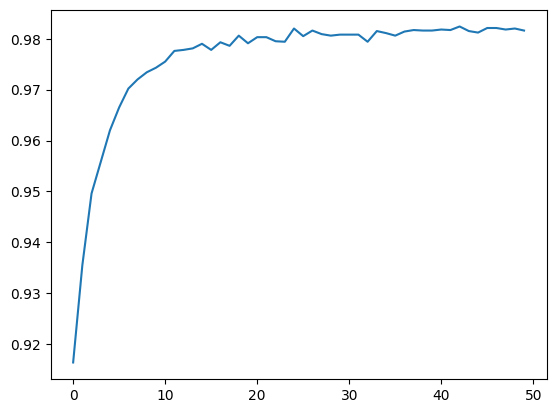

In [21]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
#=== Hyperparameters and Run Options ===#    
hyperp = Hyperparameters()
hyperp_new=Hyperparameters_new()
run_options = RunOptions()
    

    #=== File Names ===#
file_paths = FilePaths(hyperp, run_options)
    

data_train, labels_train,\
data_test, labels_test,\
data_input_shape, num_channels, label_dimensions\
= load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed)    
    
model = keras.Sequential()
model.add(layers.Dense(500, activation='linear', input_shape=(784,)))
model.add(layers.Dense(500, activation='elu'))
model.add(layers.Dense(500, activation='elu'))
model.add(layers.Dense(500, activation='elu'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()
#loss_fn=tf.nn.softmax_cross_entropy_with_logits
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=loss_fn, optimizer=opt, metrics=['accuracy'])
history=model.fit(data_train,labels_train,batch_size=1000,epochs=50,verbose=1,validation_data=(data_test, labels_test))


#model.save("WEIGHTS"+'/'+"model"+str(1))
batch_pred_test = model(data_test)
mean_accuracy_test = tf.keras.metrics.Mean()
            
mean_accuracy_test(accuracy_classification(batch_pred_test, labels_test))

plt.plot(history.history['val_accuracy'])
plt.show()


In [11]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
y=Network(data_test)

In [10]:
mean_accuracy_test = tf.keras.metrics.Mean()
mean_accuracy_test(accuracy_classification(y, labels_test))

<tf.Tensor: id=443, shape=(), dtype=float32, numpy=0.8539>

In [19]:
        data_train,new_label,labels_train=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,1)
        
        #=== Construct Validation Set and Batches ===# 
        data_and_labels_train, data_and_labels_val, data_and_labels_test,\
        num_data_train, num_data_val, num_data_test,\
        num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
        = form_train_val_test_batches(data_train, labels_train, \
                                  data_test, labels_test, \
                                  hyperp.batch_size, new_label, run_options.random_seed)


In [20]:
for batch_num_num, (batch_data_val, batch_labels_val,labels_val) in data_and_labels_val.enumerate():
    batch_data_val

In [18]:
new=batch_data_val

In [21]:
tf.norm(batch_data_val-new)

<tf.Tensor: id=987, shape=(), dtype=float32, numpy=0.0>

In [28]:
labels_train=np.squeeze(labels_train,axis=1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
Network=Final_Network(hyperp, run_options, data_input_shape, label_dimensions,
                      kernel_regularizer, bias_regularizer) 

ListWrapper([28, 10, 10, 10])


In [9]:
Network.load_weights("WEIGHTS"+'/'+"model_weights1")

In [10]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_test = tf.data.Dataset.from_tensor_slices((data_test, labels_test)).batch(batch_size)
num_batches_test = len(list(data_and_labels_test))

#=== Partitioning Out Validation Set and Constructing Batches ===#
current_num_data_train = num_data_train
num_data_train = int(0.8 * num_data_train)
num_data_val = current_num_data_train - num_data_train
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train)).shuffle(num_data_train, seed=random_seed)
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [23]:
(data_train, labels_train), (data_test, labels_test) = datasets.mnist.load_data()
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)
label_dimensions = 10
data_input_shape = data_train.shape[1:]

#=== Casting as float32 ===#
data_train = tf.cast(data_train,tf.float32)
labels_train = tf.cast(labels_train, tf.int32)
data_test = tf.cast(data_test, tf.float32)
labels_test = tf.cast(labels_test, tf.int32)
    
#=== Normalize Data ===#
data_train, data_test = data_train/255.0, data_test/255.0
data_train = tf.image.per_image_standardization(data_train) # Linearly scales each image to have mean 0 and variance 1
data_test = tf.image.per_image_standardization(data_test)   # Linearly scales each image to have mean 0 and variance 1

data_train = tf.reshape(data_train, (len(data_train), 28*28))
data_test = tf.reshape(data_test, (len(data_test), 28*28))

num_data_train = len(data_train)
num_data_test = len(data_test)
random_seed=1234
batch_size        = 1000

In [24]:
labels=tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [25]:
data_and_labels_train_full = tf.data.Dataset.from_tensor_slices((data_train, labels_train,labels)).shuffle(num_data_train, seed=random_seed)

In [26]:
data_and_labels_train = data_and_labels_train_full.take(num_data_train).batch(batch_size)
data_and_labels_val = data_and_labels_train_full.skip(num_data_train).batch(batch_size)    
num_batches_train = len(list(data_and_labels_train))
num_batches_val = len(list(data_and_labels_val))

In [32]:
for batch_num, (batch_data_train, batch_labels_train,labels) in data_and_labels_train.enumerate():
    batch=batch_num
    batch_data_train = batch_data_train
    batch_labels_train=batch_labels_train
    lab=labels

In [36]:
lab


<tf.Tensor: shape=(1000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [20]:
y_true = tf.one_hot(tf.cast(labels_train,tf.int64), label_dimensions, dtype=tf.float32)

In [21]:
y_true

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [37]:
np.mean(tf.keras.losses.mean_squared_error(new_one, val[0:dimension[0]-1]))

1.9269863

array([4, 6, 6, ..., 7, 2, 5])

In [19]:

x_train_new = batch_data_train[batch_labels_train == 1]
batch_pred_train,val=NN(x_train_new)



In [16]:
y_true = tf.one_hot(tf.cast(y_true,tf.int64), label_dimensions, dtype=tf.float32)

In [45]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.6097095>

In [48]:
np.linalg.norm(val[0]-val[1])

2.567157